Modelado con solo ataques DoS (Viernes afternoon)

Este notebook entrena y evalúa todos los modelos con el archivo del viernes tarde que contiene unicamente trafico benigno y ataques DDoS

Objetivo: Comprobar si los modelos son capaces de detectar correctamente DoS sin mezclar con otros tipos de ataques

In [1]:
import sys, os

ruta_raiz = os.path.abspath("..")
if ruta_raiz not in sys.path:
    sys.path.append(ruta_raiz)
print("Ruta actual del notebook:", os.getcwd())

Ruta actual del notebook: c:\Users\alext\Desktop\TFG Alejandro\Notebooks


In [4]:
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix
from Scripts.modelo_rf import construccion_rf_pipeline, entrenamiento_y_evaluacion_rf
from Scripts.modelo_svm import construir_svm_pipeline, entrenamiento_y_evaluacion_svm
from Scripts.modelo_decisiontree import construir_decisiontree_pipeline, entrenamiento_y_evaluacion_dt
from Scripts.modelo_naivebayes import construccion_nb_pipeline, entrenamiento_y_evaluacion_nb
from Scripts.preparacion_datos import cargar_datos_csv, preprocesar_etiquetas, dividir_datos

ruta_csv_dos = "../Datos_procesados/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX-preprocesado.csv"
df_dos = cargar_datos_csv(ruta_csv_dos)
df_dos_preprocesado = preprocesar_etiquetas(df_dos, label_col = 'Label')
x_train_dos, x_test_dos, y_train_dos, y_test_dos = dividir_datos(df_dos_preprocesado, label_col = 'Label')
print("Tamaños:", x_train_dos.shape, x_test_dos.shape, y_train_dos.shape, y_test_dos.shape)

c:\Users\alext\Desktop\TFG Alejandro\Scripts\preparacion_datos.py:27: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].clip(inferior, superior)


Datos limpiados: Eliminadas 34 filas que contenian inf o NaN
Si sale True no quedan infinitos:  True
Tamaños: (180568, 71) (45143, 71) (180568,) (45143,)


RANDOM FOREST

Informe de clasificacion:

{'0': {'precision': 0.9995906672124437, 'recall': 0.9998976353772137, 'f1-score': 0.9997441277314365, 'support': 19538.0}, '1': {'precision': 0.999921871948123, 'recall': 0.9996875610232376, 'f1-score': 0.999804702757597, 'support': 25605.0}, 'accuracy': 0.9997784817136655, 'macro avg': {'precision': 0.9997562695802833, 'recall': 0.9997925982002256, 'f1-score': 0.9997744152445167, 'support': 45143.0}, 'weighted avg': {'precision': 0.9997785257344088, 'recall': 0.9997784817136655, 'f1-score': 0.9997784857392081, 'support': 45143.0}}

 Matriz de confusion

[[19536     2]
 [    8 25597]]

Area bajo la curva ROC (AUC): 1.000
Orden de clases: [0 1]


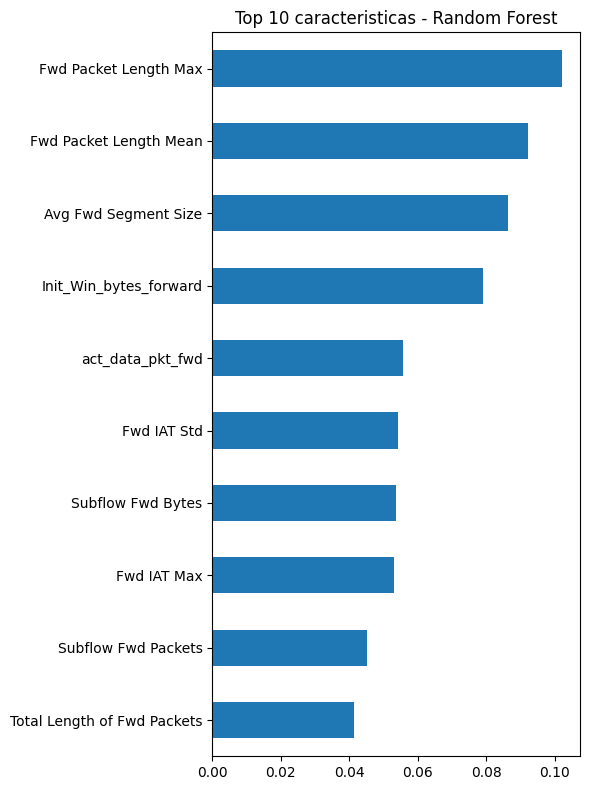

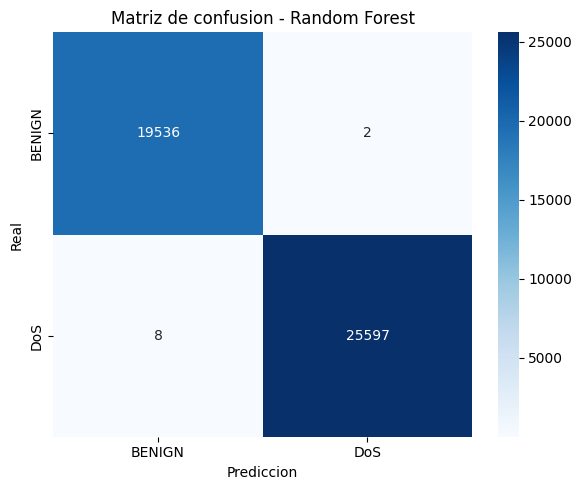

In [5]:

rf_pipe = construccion_rf_pipeline(n_estimators=100, random_state=19)
reporte_rf, cm_rf, auc_rf = entrenamiento_y_evaluacion_rf(rf_pipe, x_train_dos, x_test_dos, y_train_dos, y_test_dos, guardar_graficas=True, carpeta_salida="../Notebooks/IMAGENES/Graficas_DoS/Graficas_RandomForestDoS")

importances = rf_pipe.named_steps['rf'].feature_importances_
featured_importances = pd.Series(importances, index=x_train_dos.columns).sort_values(ascending=True)
pyplot.figure(figsize=(6,8))
featured_importances.tail(10).plot(kind = 'barh')
pyplot.title("Top 10 caracteristicas - Random Forest")
pyplot.tight_layout()
pyplot.savefig("IMAGENES/Graficas_DoS/Graficas_RandomForestDoS/caracteristicas_importantes_randomforest.png")

carpeta_salida_rf = "../Notebooks/IMAGENES/Graficas_DoS/Graficas_RandomForestDoS"
#Matriz de confusion
print("Orden de clases:", rf_pipe.classes_)
plt.figure(figsize = (6,5))
sns.heatmap(cm_rf, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['BENIGN', 'DoS'], yticklabels = ['BENIGN', 'DoS'])
plt.xlabel("Prediccion")
plt.ylabel("Real")
plt.title("Matriz de confusion - Random Forest")
plt.tight_layout()
plt.savefig(f"{carpeta_salida_rf}/matriz_confusion_randomforest")

Support Vector Machine (SVM)

Informe de clasificacion:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19538
           1       1.00      1.00      1.00     25605

    accuracy                           1.00     45143
   macro avg       1.00      1.00      1.00     45143
weighted avg       1.00      1.00      1.00     45143


 Matriz de confusion

[[19514    24]
 [   25 25580]]

Area bajo la curva ROC (AUC): 1.000


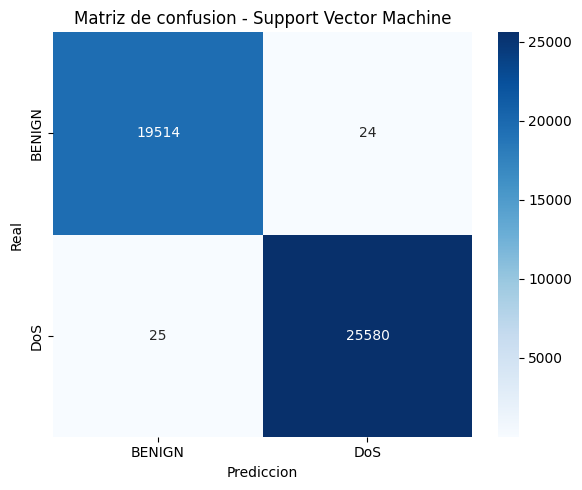

In [6]:
svm_pipe = construir_svm_pipeline(kernel = 'rbf', C = 1.0, gamma = 'scale', random_state= 19)
reporte_svm, cm_svm, auc_svm = entrenamiento_y_evaluacion_svm(svm_pipe, x_train_dos, x_test_dos, y_train_dos, y_test_dos, guardar_graficas= True, carpeta_salida="../Notebooks/IMAGENES/Graficas_DoS/Graficas_SVMDoS")
carpeta_salida_svm = "../Notebooks/IMAGENES/Graficas_DoS/Graficas_SVMDoS"
#Matriz de confusion
plt.figure(figsize = (6,5))
sns.heatmap(cm_svm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['BENIGN', 'DoS'], yticklabels = ['BENIGN', 'DoS'])
plt.xlabel("Prediccion")
plt.ylabel("Real")
plt.title("Matriz de confusion - Support Vector Machine")
plt.tight_layout()
plt.savefig(f"{carpeta_salida_svm}/matriz_confusion_SupportVectorMachine")

Decision Tree (DT)

Informe de clasificacion:

{'0': {'precision': 0.9997952602753749, 'recall': 0.9997440884430341, 'f1-score': 0.9997696737044146, 'support': 19538.0}, '1': {'precision': 0.9998047332656409, 'recall': 0.9998437805116188, 'f1-score': 0.999824256507391, 'support': 25605.0}, 'accuracy': 0.9998006335422989, 'macro avg': {'precision': 0.9997999967705079, 'recall': 0.9997939344773265, 'f1-score': 0.9997969651059029, 'support': 45143.0}, 'weighted avg': {'precision': 0.9998006333324548, 'recall': 0.9998006335422989, 'f1-score': 0.9998006329377445, 'support': 45143.0}}

 Matriz de confusion

[[19533     5]
 [    4 25601]]

Area bajo la curva ROC (AUC): 1.000


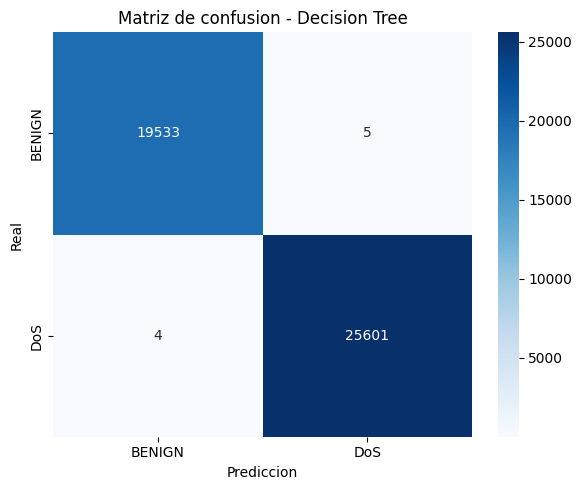

In [7]:
dt_pipe = construir_decisiontree_pipeline(criterion='gini', max_depth=None, random_state=19)
reporte_dt, cm_dt, auc_dt = entrenamiento_y_evaluacion_dt(dt_pipe, x_train_dos, x_test_dos, y_train_dos, y_test_dos, guardar_graficas=True, carpeta_salida="../Notebooks/IMAGENES/Graficas_DoS/Graficas_DecisionTreeDoS")

carpeta_salida_dt = "../Notebooks/IMAGENES/Graficas_DoS/Graficas_DecisionTreeDoS"
#Matriz de confusion
plt.figure(figsize = (6,5))
sns.heatmap(cm_dt, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['BENIGN', 'DoS'], yticklabels = ['BENIGN', 'DoS'])
plt.xlabel("Prediccion")
plt.ylabel("Real")
plt.title("Matriz de confusion - Decision Tree")
plt.tight_layout()
plt.savefig(f"{carpeta_salida_dt}/matriz_confusion_decisiontree.png")

Naive Bayes (NB)

Informe de clasificacion:

              precision    recall  f1-score   support

      BENIGN       1.00      0.98      0.99     19538
         DoS       0.98      1.00      0.99     25605

    accuracy                           0.99     45143
   macro avg       0.99      0.99      0.99     45143
weighted avg       0.99      0.99      0.99     45143

Matriz de confusion:

[[19128   410]
 [   35 25570]]
Area bajo la curva ROC (AUC): 0.9896


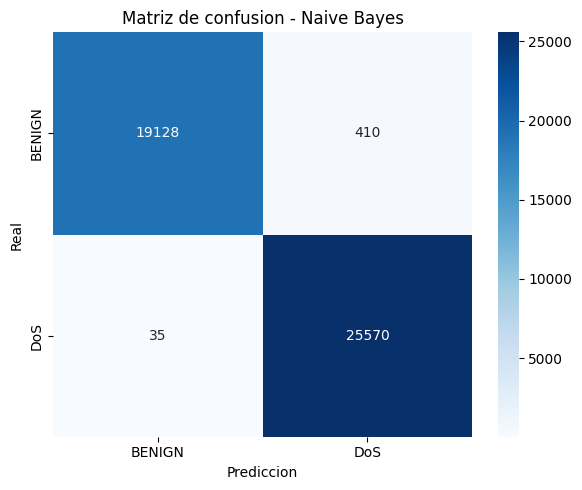

In [8]:
nb_pipe = construccion_nb_pipeline()
reporte_nb, cm_nb, auc_nb = entrenamiento_y_evaluacion_nb(nb_pipe, x_train_dos, x_test_dos, y_train_dos, y_test_dos, guardar_graficas=True, carpeta_salida="../Notebooks/IMAGENES/Graficas_DoS/Graficas_NaiveBayesDoS")

carpeta_salida_nb="../Notebooks/IMAGENES/Graficas_DoS/Graficas_NaiveBayesDoS"
#Matriz de confusion
plt.figure(figsize = (6,5))
sns.heatmap(cm_nb, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['BENIGN', 'DoS'], yticklabels = ['BENIGN', 'DoS'])
plt.xlabel("Prediccion")
plt.ylabel("Real")
plt.title("Matriz de confusion - Naive Bayes")
plt.tight_layout()
plt.savefig(f"{carpeta_salida_svm}/matriz_confusion_naivebayes")